In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ebrahimrabea","key":"73017daedf81670e5665686932ddb482"}'}

In [4]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d plameneduardo/sarscov2-ctscan-dataset

 99% 229M/230M [00:01<00:00, 148MB/s]
100% 230M/230M [00:01<00:00, 146MB/s]


In [6]:
from zipfile import ZipFile
file_name = "sarscov2-ctscan-dataset.zip"
with ZipFile(file_name , 'r')as zip:
  zip.extractall()
  print('done')

done


In [7]:
 input_folder = "/content/Dataset"
output = "/content"


In [8]:
!pip install split-folders
import splitfolders as sf
input_folder = "/content/Dataset"
output = "/content"
#where you want the split datasets saved. one will be created if none is set

sf.ratio(input_folder, output="output", seed=42, ratio=(.8, .0,.2))
#train ,val,test


Copying files: 2481 files [00:01, 2465.74 files/s]


In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import keras,os
from keras.models import*
from keras.layers import*
from keras import optimizers 
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import PIL


In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_d = ImageDataGenerator()
traindata = train_d.flow_from_directory(directory ="/content/output/train",target_size=(224,224))

test_d = ImageDataGenerator()
testdata = test_d.flow_from_directory(directory="/content/output/test",target_size=(224,224))

Found 1984 images belonging to 2 classes.
Found 497 images belonging to 2 classes.


In [11]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu",input_shape=(224,224,3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2,activation="sigmoid"))

In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 512)       5

In [20]:
model.fit_generator(traindata,
                    steps_per_epoch = 3,
                    epochs = 15,
                    validation_data = testdata)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
3/3 [==============================] - 19s 8s/step - loss: 0.6938 - accuracy: 0.4688 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 2/15
3/3 [==============================] - 9s 4s/step - loss: 0.6931 - accuracy: 0.5417 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 3/15
3/3 [==============================] - 9s 4s/step - loss: 0.6933 - accuracy: 0.4479 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 4/15
3/3 [==============================] - 9s 4s/step - loss: 0.6932 - accuracy: 0.4792 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 5/15
3/3 [==============================] - 9s 4s/step - loss: 0.6932 - accuracy: 0.4896 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 6/15
3/3 [==============================] - 9s 4s/step - loss: 0.6931 - accuracy: 0.5208 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 7/15
3/3 [==============================] - 9s 4s/step - loss: 0.6930 - accuracy: 0.5938 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 8/15
3/3 [========================

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 512)       5

In [22]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16_1.h5",
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=False,
                             mode="auto",period=1)

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=15, verbose=1, mode="auto")

hist=model.fit_generator(steps_per_epoch=5,
                         generator=traindata,
                         validation_data=testdata,
                         validation_steps=1,
                         epochs=50,
                         callbacks=[checkpoint,early])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
5/5 [==============================] - 7s 1s/step - loss: 0.6936 - accuracy: 0.4812 - val_loss: 0.6914 - val_accuracy: 0.5938

Epoch 00001: val_accuracy improved from -inf to 0.59375, saving model to vgg16_1.h5
Epoch 2/50
5/5 [==============================] - 7s 1s/step - loss: 0.6936 - accuracy: 0.4750 - val_loss: 0.6951 - val_accuracy: 0.3750

Epoch 00002: val_accuracy did not improve from 0.59375
Epoch 3/50
5/5 [==============================] - 7s 1s/step - loss: 0.6933 - accuracy: 0.4938 - val_loss: 0.6923 - val_accuracy: 0.5625

Epoch 00003: val_accuracy did not improve from 0.59375
Epoch 4/50
5/5 [==============================] - 7s 1s/step - loss: 0.6937 - accuracy: 0.4500 - val_loss: 0.6937 - val_accuracy: 0.4375

Epoch 00004: val_accuracy did not improve from 0.59375
Epoch 5/50
5/5 [==============================] - 7s 1s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5938

Epoch 00005: val_accuracy did not improve from 0.59375
Epoch 

In [23]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

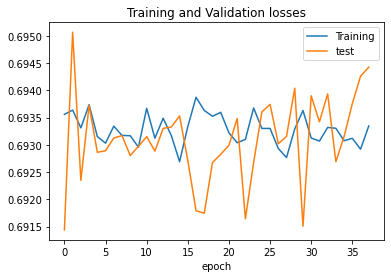

In [24]:
hist.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training','test'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')